<a href="https://colab.research.google.com/github/Pritamart/project/blob/main/Copy_of_modelfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import statsmodels.api as sm
import warnings
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import pickle

In [ ]:
df = pd.read_csv('/content/finaldata (1).csv')

In [ ]:
df

,Unnamed: 0,colour1,colour2,sub_category,category_id,type,brand,buyer,user_id,month,price_id,price,date
0,0,1,0,3,15,8,0,0,2880,11,1382,561.51,2018-12-01
1,1,4,0,3,12,8,0,0,2290,11,500,212.14,2018-12-01
2,2,3,0,5,16,23,1,0,2881,11,438,54.66,2018-12-02
3,3,1,0,5,16,8,0,0,2397,11,1381,88.90,2018-12-02
4,4,1,0,4,17,2,0,0,3128,11,1080,417.67,2018-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90554,95905,1,0,3,12,8,0,0,4005,11,17353,134.29,2021-12-01
90555,95907,1,0,3,12,8,0,0,3861,11,17353,229.99,2021-12-01
90556,95908,3,0,3,15,8,1,0,4288,11,17352,630.00,2021-12-01
90557,95909,3,0,3,15,11,0,0,2406,11,17353,83.42,2021-12-01


In [ ]:
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df['price']))
print(z)

0        0.448707
1        0.337891
2        0.692453
3        0.615362
4        0.124855
           ...   
90554    0.513168
90555    0.297702
90556    0.602911
90557    0.627700
90558    0.596855
Name: price, Length: 90559, dtype: float64


In [ ]:
threshold = 3
df1 = df[z < 3]
df1.head()

,Unnamed: 0,colour1,colour2,sub_category,category_id,type,brand,buyer,user_id,month,price_id,price,date
0,0,1,0,3,15,8,0,0,2880,11,1382,561.51,2018-12-01
1,1,4,0,3,12,8,0,0,2290,11,500,212.14,2018-12-01
2,2,3,0,5,16,23,1,0,2881,11,438,54.66,2018-12-02
3,3,1,0,5,16,8,0,0,2397,11,1381,88.90,2018-12-02
4,4,1,0,4,17,2,0,0,3128,11,1080,417.67,2018-12-02


In [ ]:
df1.shape


(89247, 13)

In [ ]:
df1 = df1.drop(df.columns[[0]], axis=1)
df1

,colour1,colour2,sub_category,category_id,type,brand,buyer,user_id,month,price_id,price,date
0,1,0,3,15,8,0,0,2880,11,1382,561.51,2018-12-01
1,4,0,3,12,8,0,0,2290,11,500,212.14,2018-12-01
2,3,0,5,16,23,1,0,2881,11,438,54.66,2018-12-02
3,1,0,5,16,8,0,0,2397,11,1381,88.90,2018-12-02
4,1,0,4,17,2,0,0,3128,11,1080,417.67,2018-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...
90554,1,0,3,12,8,0,0,4005,11,17353,134.29,2021-12-01
90555,1,0,3,12,8,0,0,3861,11,17353,229.99,2021-12-01
90556,3,0,3,15,8,1,0,4288,11,17352,630.00,2021-12-01
90557,3,0,3,15,11,0,0,2406,11,17353,83.42,2021-12-01


In [ ]:
X = df1.drop(['price'], axis=1)
y = df1['price']

In [ ]:
import pandas as pd

X1=pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
X1

,colour1,colour2,sub_category,category_id,type,brand,buyer,user_id,month,price_id,...,date_2021-11-22,date_2021-11-23,date_2021-11-24,date_2021-11-25,date_2021-11-26,date_2021-11-27,date_2021-11-28,date_2021-11-29,date_2021-11-30,date_2021-12-01
0,1,0,3,15,8,0,0,2880,11,1382,...,0,0,0,0,0,0,0,0,0,0
1,4,0,3,12,8,0,0,2290,11,500,...,0,0,0,0,0,0,0,0,0,0
2,3,0,5,16,23,1,0,2881,11,438,...,0,0,0,0,0,0,0,0,0,0
3,1,0,5,16,8,0,0,2397,11,1381,...,0,0,0,0,0,0,0,0,0,0
4,1,0,4,17,2,0,0,3128,11,1080,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90554,1,0,3,12,8,0,0,4005,11,17353,...,0,0,0,0,0,0,0,0,0,1
90555,1,0,3,12,8,0,0,3861,11,17353,...,0,0,0,0,0,0,0,0,0,1
90556,3,0,3,15,8,1,0,4288,11,17352,...,0,0,0,0,0,0,0,0,0,1
90557,3,0,3,15,11,0,0,2406,11,17353,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_													
print('Variance score: {}'.format(lm.score(X_test, y_test)))
predictions = lm.predict(X_test)

plt.scatter(np.array(y_test),predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

predictions_train = lm.predict(X_train)
print('RMSE_train :'," ", np.sqrt(metrics.mean_squared_error(y_train,predictions_train)/len(np.array(y_train))))
print('RMSE_test :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)/len(np.array(y_test))))

ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.07547578992719217


In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([438.04337529, 426.62921972, 417.73849385, ..., 232.79976682,
       -31.19785856, 303.16357266])

In [ ]:

filename = '/content/LinearRegression_model'
pickle.dump(lm,open(filename,'wb'))


In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(['price'], axis=1)
y = df1['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
test_date=X_test['date']
X_train1=X_train.drop(['date'], axis=1)
X_test1=X_test.drop(['date'], axis=1)
X_train1.shape
y_train.shape

(71397,)

[281.9869 215.14   260.2131 ... 156.0562 436.2294 114.8022]
RandomForestRegressor(random_state=0)
RMSE_train :   0.10689775974181398
RMSE_test :   0.5938093777209569


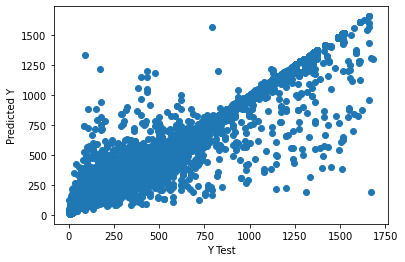

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train1,y_train)
predict=model.predict(X_test1)
print(predict)
print(model)

predictions = model.predict(X_test1)
plt.scatter(np.array(y_test),predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
predictions_train = model.predict(X_train1)
print('RMSE_train :'," ", np.sqrt(metrics.mean_squared_error(y_train,predictions_train)/len(np.array(y_train))))
print('RMSE_test :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)/len(np.array(y_test))))

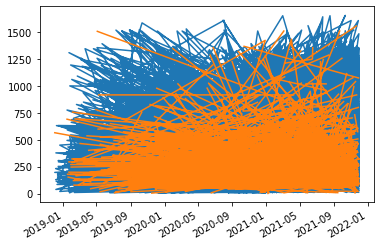

In [ ]:
date_time = pd.to_datetime(test_date)
DF = pd.DataFrame()
DF['value1'] = predictions
DF['value2'] = y_test
DF = DF.set_index(date_time)
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

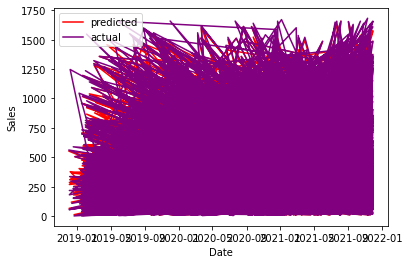

In [ ]:
date_time = pd.to_datetime(test_date)
plt.plot(date_time,predictions,color='red',label='predicted')
plt.plot(date_time,y_test,color='purple',label="actual")
plt.xlabel("Date")
plt.ylabel("Sales")
leg = plt.legend()
plt.show()

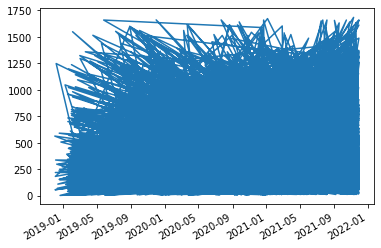

In [ ]:
date_time = pd.to_datetime(test_date)
DF = pd.DataFrame()
DF['value'] = y_test
DF = DF.set_index(date_time)
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
filename = '/content/Random Forest_model'
pickle.dump(regressor,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([ 333.3853,  171.1   ,  468.9208, ...,  527.26  , 2145.9277,
         89.5935])

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.9119812747956063


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm
pred_y_test_rolling =[]

In [ ]:
for i in tqdm(range(len(X_test1))):
    X_train1 = X_train1.append(X_test1[-1+i:i])
    y_train = y_train.append(y_test[-1+i:i])
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    model1 = model.fit(X_train1,y_train)
    a=float(model1.predict(X_test1[0+i:1+i]))
    print(a)
    pred_y_test_rolling.append(a)


  0%|          | 1/17850 [00:23<115:03:35, 23.21s/it]

136.85000000000025


  0%|          | 2/17850 [00:46<114:50:49, 23.17s/it]

215.13999999999945


  0%|          | 3/17850 [01:09<115:45:48, 23.35s/it]

253.2900000000006


  0%|          | 4/17850 [01:33<116:21:16, 23.47s/it]

380.5207999999999


  0%|          | 5/17850 [01:56<115:39:27, 23.33s/it]

144.8445000000003


  0%|          | 6/17850 [02:18<113:41:09, 22.94s/it]

235.6885000000001


  0%|          | 7/17850 [02:42<114:05:26, 23.02s/it]

1195.75


  0%|          | 8/17850 [03:05<114:39:12, 23.13s/it]

555.2769000000008


  0%|          | 9/17850 [03:28<115:10:31, 23.24s/it]

719.0400000000002


  0%|          | 10/17850 [03:53<116:32:12, 23.52s/it]

480.81999999999977


  0%|          | 11/17850 [04:16<116:13:26, 23.45s/it]

267.2226


  0%|          | 12/17850 [04:39<115:26:30, 23.30s/it]

1561.3624000000027


  0%|          | 13/17850 [05:01<114:20:55, 23.08s/it]

125.54749999999989


  0%|          | 14/17850 [05:24<114:26:48, 23.10s/it]

548.1523999999994


  0%|          | 15/17850 [05:48<115:02:43, 23.22s/it]

352.9000000000008


  0%|          | 16/17850 [06:11<115:11:00, 23.25s/it]

250.38719999999984


  0%|          | 17/17850 [06:35<115:34:17, 23.33s/it]

259.97000000000094


  0%|          | 18/17850 [06:58<115:40:50, 23.35s/it]

362.88


  0%|          | 19/17850 [07:21<114:34:10, 23.13s/it]

460.1399999999996


  0%|          | 20/17850 [07:44<114:39:41, 23.15s/it]

266.9900000000005


  0%|          | 21/17850 [08:07<114:34:20, 23.13s/it]

766.9900000000001


  0%|          | 22/17850 [08:31<114:57:32, 23.21s/it]

194.31999999999974


  0%|          | 23/17850 [08:54<114:56:54, 23.21s/it]

495.9208000000006


  0%|          | 24/17850 [09:17<115:06:44, 23.25s/it]

205.27150000000012


  0%|          | 25/17850 [09:40<114:05:48, 23.04s/it]

335.47999999999973


  0%|          | 26/17850 [10:03<114:27:21, 23.12s/it]

91.64000000000007


  0%|          | 27/17850 [10:27<115:24:31, 23.31s/it]

295.54489999999964


  0%|          | 28/17850 [10:51<117:19:13, 23.70s/it]

308.0800000000008


  0%|          | 29/17850 [11:16<118:13:20, 23.88s/it]

85.13129999999988


  0%|          | 30/17850 [11:40<119:22:14, 24.12s/it]

1054.3625999999995


  0%|          | 31/17850 [12:05<120:40:27, 24.38s/it]

383.41999999999905


  0%|          | 32/17850 [12:31<122:25:08, 24.73s/it]

304.8230999999997


  0%|          | 33/17850 [12:55<122:09:21, 24.68s/it]

575.2099999999992


  0%|          | 34/17850 [13:21<123:02:20, 24.86s/it]

138.21999999999977


  0%|          | 35/17850 [13:46<123:24:50, 24.94s/it]

341.9945000000005


  0%|          | 36/17850 [14:10<121:57:25, 24.65s/it]

231.38559999999978


  0%|          | 37/17850 [14:34<121:16:58, 24.51s/it]

364.6882


  0%|          | 38/17850 [15:00<123:07:39, 24.89s/it]

814.9299999999988


  0%|          | 39/17850 [15:26<124:50:22, 25.23s/it]

71.16720000000011


  0%|          | 40/17850 [15:50<123:30:18, 24.96s/it]

170.91429999999983


  0%|          | 41/17850 [16:15<123:47:15, 25.02s/it]

334.2555000000004


  0%|          | 42/17850 [16:40<122:57:57, 24.86s/it]

87.20999999999995


  0%|          | 43/17850 [17:04<121:42:01, 24.60s/it]

562.8799999999991


  0%|          | 44/17850 [17:29<121:58:09, 24.66s/it]

225.88999999999967


  0%|          | 45/17850 [17:53<121:06:00, 24.49s/it]

337.14060000000063


  0%|          | 46/17850 [18:16<119:57:03, 24.25s/it]

253.29000000000062


  0%|          | 47/17850 [18:42<121:24:45, 24.55s/it]

184.63380000000024


  0%|          | 48/17850 [19:07<122:54:16, 24.85s/it]

299.51959999999985


  0%|          | 49/17850 [19:32<123:20:15, 24.94s/it]

398.87779999999987


  0%|          | 50/17850 [19:57<122:48:26, 24.84s/it]

643.6999999999988


  0%|          | 51/17850 [20:22<122:52:22, 24.85s/it]

705.3399999999982


  0%|          | 52/17850 [20:47<123:15:33, 24.93s/it]

259.970000000001


  0%|          | 53/17850 [21:11<121:54:28, 24.66s/it]

410.81999999999977


  0%|          | 54/17850 [21:35<120:46:08, 24.43s/it]

365.6197


  0%|          | 55/17850 [21:58<119:04:18, 24.09s/it]

946.8106000000004


  0%|          | 56/17850 [22:21<117:24:03, 23.75s/it]

214.56729999999996


  0%|          | 57/17850 [22:44<116:15:01, 23.52s/it]

1317.2483


  0%|          | 58/17850 [23:07<115:49:08, 23.43s/it]

306.5732000000008


  0%|          | 59/17850 [23:31<115:48:32, 23.43s/it]

384.58179999999965


  0%|          | 60/17850 [23:54<115:15:02, 23.32s/it]

230.84999999999974


  0%|          | 61/17850 [24:17<115:08:14, 23.30s/it]

90.28349999999999


  0%|          | 62/17850 [24:39<113:57:00, 23.06s/it]

796.7265


  0%|          | 63/17850 [25:02<113:37:08, 23.00s/it]

309.4199999999992


  0%|          | 64/17850 [25:26<113:51:19, 23.05s/it]

242.90000000000057


  0%|          | 65/17850 [25:49<114:05:40, 23.09s/it]

354.06999999999977


  0%|          | 66/17850 [26:13<115:18:00, 23.34s/it]

539.4083000000008


  0%|          | 67/17850 [26:37<116:13:28, 23.53s/it]

135.6514


  0%|          | 68/17850 [27:00<115:49:25, 23.45s/it]

272.3742000000001


  0%|          | 69/17850 [27:24<116:36:16, 23.61s/it]

234.11000000000033


  0%|          | 70/17850 [27:48<117:50:23, 23.86s/it]

801.2300000000006


  0%|          | 71/17850 [28:13<119:11:44, 24.14s/it]

116.91789999999988


  0%|          | 72/17850 [28:38<120:17:16, 24.36s/it]

750.3421999999996


  0%|          | 73/17850 [29:02<120:26:37, 24.39s/it]

32.01999999999995


  0%|          | 74/17850 [29:27<120:53:28, 24.48s/it]

1280.6799999999967


  0%|          | 75/17850 [29:52<121:01:39, 24.51s/it]

191.6399999999997


  0%|          | 76/17850 [30:16<120:38:15, 24.43s/it]

121.78000000000016


  0%|          | 77/17850 [30:40<120:30:21, 24.41s/it]

710.773799999999


  0%|          | 78/17850 [31:05<120:25:52, 24.40s/it]

492.0398999999991


  0%|          | 79/17850 [31:29<120:28:08, 24.40s/it]

225.75299999999967


  0%|          | 80/17850 [31:53<120:15:49, 24.36s/it]

179.43099999999987


  0%|          | 81/17850 [32:18<120:31:01, 24.42s/it]

418.2561999999996


  0%|          | 82/17850 [32:42<120:26:19, 24.40s/it]

296.57730000000004


  0%|          | 83/17850 [33:06<119:14:03, 24.16s/it]

206.32120000000035


  0%|          | 84/17850 [33:30<119:20:16, 24.18s/it]

242.78249999999997


  0%|          | 85/17850 [33:54<119:35:59, 24.24s/it]

183.06670000000005


  0%|          | 86/17850 [34:19<119:54:46, 24.30s/it]

663.2600000000006


  0%|          | 87/17850 [34:43<119:29:26, 24.22s/it]

294.31089999999955


  0%|          | 88/17850 [35:06<117:57:15, 23.91s/it]

159.44000000000014


  0%|          | 89/17850 [35:29<116:53:45, 23.69s/it]

109.45000000000009


  1%|          | 90/17850 [35:52<115:54:03, 23.49s/it]

123.14999999999976


  1%|          | 91/17850 [36:14<113:52:40, 23.08s/it]

204.77270000000001


  1%|          | 92/17850 [36:38<113:50:05, 23.08s/it]

205.34000000000012


  1%|          | 93/17850 [37:01<114:00:05, 23.11s/it]

172.97609999999997


  1%|          | 94/17850 [37:24<114:09:31, 23.15s/it]

136.8924999999999


  1%|          | 95/17850 [37:47<113:59:15, 23.11s/it]

800.9676999999986


  1%|          | 96/17850 [38:10<114:03:31, 23.13s/it]

143.70000000000022


  1%|          | 97/17850 [38:33<113:01:39, 22.92s/it]

96.17509999999992


  1%|          | 98/17850 [38:56<113:29:56, 23.02s/it]

259.970000000001


  1%|          | 99/17850 [39:19<114:06:05, 23.14s/it]

355.01680000000016


  1%|          | 100/17850 [39:43<114:34:22, 23.24s/it]

653.2464999999996


  1%|          | 101/17850 [40:06<114:46:56, 23.28s/it]

82.25550000000013


  1%|          | 102/17850 [40:29<114:40:34, 23.26s/it]

506.7099999999993


  1%|          | 103/17850 [40:52<113:48:04, 23.08s/it]

264.47980000000024


  1%|          | 104/17850 [41:15<113:34:05, 23.04s/it]

307.75029999999964


  1%|          | 105/17850 [41:38<113:29:40, 23.03s/it]

347.81000000000034


  1%|          | 106/17850 [42:01<113:44:19, 23.08s/it]

165.90460000000022


  1%|          | 107/17850 [42:24<114:01:33, 23.14s/it]

83.42000000000006


  1%|          | 108/17850 [42:48<114:17:11, 23.19s/it]

297.99029999999965


  1%|          | 109/17850 [43:11<113:57:30, 23.12s/it]

598.7427999999991


  1%|          | 110/17850 [43:34<113:58:27, 23.13s/it]

539.6607000000002


  1%|          | 111/17850 [43:57<114:12:48, 23.18s/it]

10.269999999999987


  1%|          | 112/17850 [44:20<114:04:53, 23.15s/it]

230.21789999999982


  1%|          | 113/17850 [44:43<114:04:05, 23.15s/it]

163.15999999999988


  1%|          | 114/17850 [45:07<114:50:36, 23.31s/it]

150.84960000000024


  1%|          | 115/17850 [45:31<116:18:01, 23.61s/it]

82.48860000000009


  1%|          | 116/17850 [45:55<116:22:04, 23.62s/it]

200.37419999999966


  1%|          | 117/17850 [46:18<115:35:25, 23.47s/it]

142.32999999999996


  1%|          | 118/17850 [46:41<115:18:37, 23.41s/it]

177.11530000000027


  1%|          | 119/17850 [47:04<114:51:13, 23.32s/it]

438.5948000000006


  1%|          | 120/17850 [47:27<114:19:15, 23.21s/it]

242.90000000000057


  1%|          | 121/17850 [47:51<114:13:44, 23.20s/it]

321.67330000000067


  1%|          | 122/17850 [48:13<113:23:37, 23.03s/it]

207.45000000000033


  1%|          | 123/17850 [48:36<112:59:21, 22.95s/it]

291.65450000000027


  1%|          | 124/17850 [48:59<113:14:49, 23.00s/it]

146.30439999999976


  1%|          | 125/17850 [49:23<113:50:56, 23.12s/it]

96.21700000000021


  1%|          | 126/17850 [49:46<114:04:25, 23.17s/it]

270.8314000000002


  1%|          | 127/17850 [50:09<114:03:09, 23.17s/it]

266.5600000000004


  1%|          | 128/17850 [50:31<112:49:24, 22.92s/it]

659.9066000000001


  1%|          | 129/17850 [50:54<112:43:54, 22.90s/it]

334.62699999999944


  1%|          | 130/17850 [51:17<112:46:52, 22.91s/it]

135.4799999999997


  1%|          | 131/17850 [51:40<113:15:34, 23.01s/it]

229.99000000000032


  1%|          | 132/17850 [52:03<113:10:51, 23.00s/it]

325.88999999999953


  1%|          | 133/17850 [52:27<113:30:04, 23.06s/it]

85.89449999999995


  1%|          | 134/17850 [52:49<112:31:47, 22.87s/it]

472.47000000000065


  1%|          | 135/17850 [53:12<113:03:04, 22.97s/it]

573.699999999999


  1%|          | 136/17850 [53:35<113:30:11, 23.07s/it]

130.9589


  1%|          | 137/17850 [53:59<113:59:15, 23.17s/it]

331.6440000000006


  1%|          | 138/17850 [54:22<114:21:05, 23.24s/it]

82.77630000000012


  1%|          | 139/17850 [54:45<114:22:17, 23.25s/it]

130.15999999999988


  1%|          | 140/17850 [55:08<112:46:58, 22.93s/it]

1349.1799999999964


  1%|          | 141/17850 [55:31<113:19:54, 23.04s/it]

763.5653000000003


  1%|          | 142/17850 [55:54<113:44:48, 23.12s/it]

294.3800000000003


  1%|          | 143/17850 [56:17<113:44:26, 23.12s/it]

843.6319999999987


  1%|          | 144/17850 [56:41<114:01:06, 23.18s/it]

251.08910000000017


  1%|          | 145/17850 [57:04<113:55:20, 23.16s/it]

277.9500000000005


  1%|          | 146/17850 [57:26<113:00:30, 22.98s/it]

590.1877999999988


  1%|          | 147/17850 [57:49<112:54:33, 22.96s/it]

109.45000000000009


  1%|          | 148/17850 [58:13<113:14:26, 23.03s/it]

188.3935000000003


  1%|          | 149/17850 [58:36<113:19:36, 23.05s/it]

164.25


  1%|          | 150/17850 [58:59<113:29:37, 23.08s/it]

158.0729000000002


  1%|          | 151/17850 [59:22<113:43:24, 23.13s/it]

209.81000000000012


  1%|          | 152/17850 [59:44<112:24:34, 22.87s/it]

651.1064000000007


  1%|          | 153/17850 [1:00:07<112:51:47, 22.96s/it]

325.8899999999995


  1%|          | 154/17850 [1:00:30<112:58:14, 22.98s/it]

358.2219999999998


  1%|          | 155/17850 [1:00:54<113:03:31, 23.00s/it]

445.94999999999925


  1%|          | 156/17850 [1:01:17<113:17:00, 23.05s/it]

101.32549999999986


  1%|          | 157/17850 [1:01:40<113:48:41, 23.16s/it]

170.23229999999984


  1%|          | 158/17850 [1:02:02<112:30:43, 22.89s/it]

903.970000000001


  1%|          | 159/17850 [1:02:26<114:03:45, 23.21s/it]

411.43639999999976


  1%|          | 160/17850 [1:02:51<115:34:37, 23.52s/it]

375.40559999999925


  1%|          | 161/17850 [1:03:16<118:26:04, 24.10s/it]

329.99639999999965


  1%|          | 162/17850 [1:03:40<118:53:17, 24.20s/it]

437.91919999999976


  1%|          | 163/17850 [1:04:06<120:47:27, 24.59s/it]

445.94999999999925


  1%|          | 164/17850 [1:04:34<125:21:08, 25.52s/it]

97.1200000000001


  1%|          | 165/17850 [1:05:00<126:26:20, 25.74s/it]

259.97000000000094


  1%|          | 166/17850 [1:05:27<128:51:40, 26.23s/it]

219.04000000000053


  1%|          | 167/17850 [1:05:54<129:34:26, 26.38s/it]

428.62999999999965


  1%|          | 168/17850 [1:06:19<127:32:45, 25.97s/it]

247.95000000000044


  1%|          | 169/17850 [1:06:45<128:05:55, 26.08s/it]

317.66999999999916


  1%|          | 170/17850 [1:07:12<128:39:47, 26.20s/it]

1281.3699999999992


  1%|          | 171/17850 [1:07:37<127:10:52, 25.90s/it]

222.3553999999999


  1%|          | 172/17850 [1:08:03<126:49:20, 25.83s/it]

281.9900000000005


  1%|          | 173/17850 [1:08:26<123:20:22, 25.12s/it]

314.61599999999993


  1%|          | 174/17850 [1:08:49<120:24:46, 24.52s/it]

328.6300000000003


  1%|          | 175/17850 [1:09:12<118:29:16, 24.13s/it]

319.0099999999993


  1%|          | 176/17850 [1:09:36<117:06:32, 23.85s/it]

182.65999999999988


  1%|          | 177/17850 [1:09:59<116:10:39, 23.67s/it]

486.40260000000046


  1%|          | 178/17850 [1:10:22<115:35:08, 23.55s/it]

131.26440000000017


  1%|          | 179/17850 [1:10:45<114:42:47, 23.37s/it]

470.8658999999991


  1%|          | 180/17850 [1:11:07<113:04:37, 23.04s/it]

601.2200000000008


  1%|          | 181/17850 [1:11:30<112:59:42, 23.02s/it]

490.1600000000012


  1%|          | 182/17850 [1:11:54<113:24:44, 23.11s/it]

344.18869999999987


  1%|          | 183/17850 [1:12:17<113:40:28, 23.16s/it]

493.0100000000002


  1%|          | 184/17850 [1:12:40<113:43:47, 23.18s/it]

272.4700000000003


  1%|          | 185/17850 [1:13:03<113:14:23, 23.08s/it]

142.77729999999988


  1%|          | 186/17850 [1:13:26<112:48:41, 22.99s/it]

102.6000000000002


  1%|          | 187/17850 [1:13:49<112:50:52, 23.00s/it]

515.7009000000005


  1%|          | 188/17850 [1:14:12<112:59:18, 23.03s/it]

77.57990000000012


  1%|          | 189/17850 [1:14:35<113:09:03, 23.06s/it]

709.2861999999992


  1%|          | 190/17850 [1:14:58<113:20:48, 23.11s/it]

263.5159999999998


  1%|          | 191/17850 [1:15:21<112:56:54, 23.03s/it]

204.4199999999997


  1%|          | 192/17850 [1:15:44<112:22:57, 22.91s/it]

458.3120999999997


  1%|          | 193/17850 [1:16:07<112:44:19, 22.99s/it]

116.42309999999985


  1%|          | 194/17850 [1:16:30<113:12:01, 23.08s/it]

215.1399999999995


  1%|          | 195/17850 [1:16:53<113:09:52, 23.08s/it]

203.37639999999993


  1%|          | 196/17850 [1:17:16<113:16:05, 23.10s/it]

1195.75


  1%|          | 197/17850 [1:17:39<112:24:51, 22.92s/it]

431.37000000000046


  1%|          | 198/17850 [1:18:02<112:39:47, 22.98s/it]

283.24160000000006


  1%|          | 199/17850 [1:18:25<112:58:55, 23.04s/it]

561.5100000000004


  1%|          | 200/17850 [1:18:48<112:54:46, 23.03s/it]

288.8899999999996


  1%|          | 201/17850 [1:19:12<113:19:36, 23.12s/it]

182.65999999999988


  1%|          | 202/17850 [1:19:35<113:43:38, 23.20s/it]

486.1600000000011


  1%|          | 203/17850 [1:19:57<112:30:00, 22.95s/it]

1020.4100000000025


  1%|          | 204/17850 [1:20:21<112:49:04, 23.02s/it]

308.0800000000008


  1%|          | 205/17850 [1:20:44<112:55:25, 23.04s/it]

6.710000000000003


  1%|          | 206/17850 [1:21:07<112:44:03, 23.00s/it]

71.10000000000012


  1%|          | 207/17850 [1:21:30<112:42:33, 23.00s/it]

225.88999999999967


  1%|          | 208/17850 [1:21:53<112:54:55, 23.04s/it]

163.15999999999988


  1%|          | 209/17850 [1:22:15<112:24:14, 22.94s/it]

199.31200000000013


  1%|          | 210/17850 [1:22:39<113:07:12, 23.09s/it]

10.269999999999987


  1%|          | 211/17850 [1:23:02<113:21:28, 23.14s/it]

636.849999999999


  1%|          | 212/17850 [1:23:25<113:38:42, 23.20s/it]

82.67310000000012


  1%|          | 213/17850 [1:23:49<113:36:43, 23.19s/it]

349.18000000000023


  1%|          | 214/17850 [1:24:12<113:31:19, 23.17s/it]

239.59000000000012


  1%|          | 215/17850 [1:24:34<112:16:20, 22.92s/it]

516.9569000000007


  1%|          | 216/17850 [1:24:57<112:41:02, 23.00s/it]

417.669999999999


  1%|          | 217/17850 [1:25:20<113:01:32, 23.08s/it]

185.9821


  1%|          | 218/17850 [1:25:44<113:10:26, 23.11s/it]

600.6800000000002


  1%|          | 219/17850 [1:26:07<113:17:17, 23.13s/it]

601.2200000000008


  1%|          | 220/17850 [1:26:30<112:54:51, 23.06s/it]

71.14110000000011


  1%|          | 221/17850 [1:26:52<112:14:55, 22.92s/it]

153.0049999999998


  1%|          | 222/17850 [1:27:16<113:40:56, 23.22s/it]

96.93419999999983


  1%|          | 223/17850 [1:27:40<114:50:35, 23.45s/it]

1074.8289000000002


  1%|▏         | 224/17850 [1:28:04<114:47:47, 23.45s/it]

171.1000000000002


  1%|▏         | 225/17850 [1:28:27<114:36:48, 23.41s/it]

228.24619999999973


  1%|▏         | 226/17850 [1:28:50<114:19:33, 23.35s/it]

201.17410000000018


  1%|▏         | 227/17850 [1:29:14<114:28:47, 23.39s/it]

1195.75


  1%|▏         | 228/17850 [1:29:36<113:06:19, 23.11s/it]

186.9271000000004


  1%|▏         | 229/17850 [1:29:59<113:01:06, 23.09s/it]

328.6300000000002


  1%|▏         | 230/17850 [1:30:22<112:56:16, 23.07s/it]

99.95689999999993


  1%|▏         | 231/17850 [1:30:45<112:28:29, 22.98s/it]

171.47000000000023


  1%|▏         | 232/17850 [1:31:07<111:35:24, 22.80s/it]

58.930299999999924


  1%|▏         | 233/17850 [1:31:30<111:13:27, 22.73s/it]

534.1100000000005


  1%|▏         | 234/17850 [1:31:52<110:33:51, 22.59s/it]

127.27790000000023


  1%|▏         | 235/17850 [1:32:14<109:49:34, 22.45s/it]

157.33149999999975


  1%|▏         | 236/17850 [1:32:37<109:29:58, 22.38s/it]

223.07390000000032


  1%|▏         | 237/17850 [1:33:01<111:54:36, 22.87s/it]

766.9900000000001


  1%|▏         | 238/17850 [1:33:26<115:05:15, 23.52s/it]

140.6200000000003


  1%|▏         | 239/17850 [1:33:52<118:40:09, 24.26s/it]

221.63229999999993


  1%|▏         | 240/17850 [1:34:16<118:18:00, 24.18s/it]

251.6460000000006


  1%|▏         | 241/17850 [1:34:39<117:42:54, 24.07s/it]

424.5199999999996


  1%|▏         | 242/17850 [1:35:03<117:26:22, 24.01s/it]

75.07300000000004


  1%|▏         | 243/17850 [1:35:27<117:42:15, 24.07s/it]

336.25529999999986


  1%|▏         | 244/17850 [1:35:51<116:51:07, 23.89s/it]

344.18000000000023


  1%|▏         | 245/17850 [1:36:14<115:14:10, 23.56s/it]

228.6972999999999


  1%|▏         | 246/17850 [1:36:36<113:25:57, 23.20s/it]

219.53280000000012


  1%|▏         | 247/17850 [1:36:58<111:47:20, 22.86s/it]

259.1601000000002


  1%|▏         | 248/17850 [1:37:20<110:18:53, 22.56s/it]

130.69770000000014


  1%|▏         | 249/17850 [1:37:43<110:12:22, 22.54s/it]

68.0174999999999


  1%|▏         | 250/17850 [1:38:05<109:58:57, 22.50s/it]

212.46399999999983


  1%|▏         | 251/17850 [1:38:27<109:48:21, 22.46s/it]

430.1370000000004


  1%|▏         | 252/17850 [1:38:50<109:56:17, 22.49s/it]

369.7300000000001


  1%|▏         | 253/17850 [1:39:12<109:40:41, 22.44s/it]

143.98999999999984


  1%|▏         | 254/17850 [1:39:35<109:41:18, 22.44s/it]

62.8800000000001


  1%|▏         | 255/17850 [1:39:57<110:11:21, 22.55s/it]

460.1399999999996


  1%|▏         | 256/17850 [1:40:20<110:51:17, 22.68s/it]

56.05740000000001


  1%|▏         | 257/17850 [1:40:44<112:44:01, 23.07s/it]

451.09809999999896


  1%|▏         | 258/17850 [1:41:08<113:28:22, 23.22s/it]

229.56000000000026


  1%|▏         | 259/17850 [1:41:32<114:18:31, 23.39s/it]

251.50900000000055


  1%|▏         | 260/17850 [1:41:56<114:59:30, 23.53s/it]

351.2211999999997


  1%|▏         | 261/17850 [1:42:18<113:56:22, 23.32s/it]

262.5987000000001


  1%|▏         | 262/17850 [1:42:41<112:33:22, 23.04s/it]

575.2099999999992


  1%|▏         | 263/17850 [1:43:03<111:35:12, 22.84s/it]

361.2845000000002


  1%|▏         | 264/17850 [1:43:26<110:57:11, 22.71s/it]

166.1399999999998


  1%|▏         | 265/17850 [1:43:48<110:04:16, 22.53s/it]

229.09640000000027


  1%|▏         | 266/17850 [1:44:10<109:42:29, 22.46s/it]

1093.0099999999982


  1%|▏         | 267/17850 [1:44:32<109:30:47, 22.42s/it]

182.65999999999988


  2%|▏         | 268/17850 [1:44:55<109:24:55, 22.40s/it]

551.0290999999994


  2%|▏         | 269/17850 [1:45:17<109:35:04, 22.44s/it]

341.43530000000004


  2%|▏         | 270/17850 [1:45:40<109:38:03, 22.45s/it]

141.9653


  2%|▏         | 271/17850 [1:46:02<109:20:14, 22.39s/it]

976.8399999999976


  2%|▏         | 272/17850 [1:46:24<109:24:35, 22.41s/it]

212.92630000000034


  2%|▏         | 273/17850 [1:46:47<109:34:24, 22.44s/it]

862.043899999999


  2%|▏         | 274/17850 [1:47:09<109:08:04, 22.35s/it]

254.27369999999996


  2%|▏         | 275/17850 [1:47:31<109:08:58, 22.36s/it]

345.52000000000015


  2%|▏         | 276/17850 [1:47:54<109:13:55, 22.38s/it]

657.400000000001


  2%|▏         | 277/17850 [1:48:16<109:13:10, 22.37s/it]

280.73980000000006


  2%|▏         | 278/17850 [1:48:39<109:12:44, 22.37s/it]

534.1100000000005


  2%|▏         | 279/17850 [1:49:01<109:18:57, 22.40s/it]

242.90000000000055


  2%|▏         | 280/17850 [1:49:24<109:31:37, 22.44s/it]

260.3388000000003


  2%|▏         | 281/17850 [1:49:46<109:27:31, 22.43s/it]

496.9148000000004


  2%|▏         | 282/17850 [1:50:09<110:20:12, 22.61s/it]

314.93000000000023


  2%|▏         | 283/17850 [1:50:32<110:48:00, 22.71s/it]

249.38550000000006


  2%|▏         | 284/17850 [1:50:55<110:52:19, 22.72s/it]

309.4506000000002


  2%|▏         | 285/17850 [1:51:18<111:00:48, 22.75s/it]

129.02710000000016


  2%|▏         | 286/17850 [1:51:40<110:31:55, 22.66s/it]

293.78180000000026


  2%|▏         | 287/17850 [1:52:02<109:44:47, 22.50s/it]

105.3400000000001


  2%|▏         | 288/17850 [1:52:25<109:44:42, 22.50s/it]

296.46149999999926


  2%|▏         | 289/17850 [1:52:47<109:54:00, 22.53s/it]

186.50499999999985


  2%|▏         | 290/17850 [1:53:10<110:07:36, 22.58s/it]

277.6047999999995


  2%|▏         | 291/17850 [1:53:32<109:58:10, 22.55s/it]

282.1371000000006


  2%|▏         | 292/17850 [1:53:55<110:25:05, 22.64s/it]

209.81000000000012


  2%|▏         | 293/17850 [1:54:18<110:42:51, 22.70s/it]

318.7514000000006


  2%|▏         | 294/17850 [1:54:41<110:56:41, 22.75s/it]

207.45000000000033


  2%|▏         | 295/17850 [1:55:04<110:43:04, 22.70s/it]

116.26950000000014


  2%|▏         | 296/17850 [1:55:26<110:58:21, 22.76s/it]

440.57090000000034


  2%|▏         | 297/17850 [1:55:49<111:01:47, 22.77s/it]

427.79560000000043


  2%|▏         | 298/17850 [1:56:12<110:47:38, 22.72s/it]

206.52099999999987


  2%|▏         | 299/17850 [1:56:34<110:10:19, 22.60s/it]

116.2666000000002


  2%|▏         | 300/17850 [1:56:56<109:17:58, 22.42s/it]

302.16299999999944


  2%|▏         | 301/17850 [1:57:19<109:25:57, 22.45s/it]

237.98209999999975


  2%|▏         | 302/17850 [1:57:41<109:43:06, 22.51s/it]

135.32540000000017


  2%|▏         | 303/17850 [1:58:04<109:57:49, 22.56s/it]

231.34139999999996


  2%|▏         | 304/17850 [1:58:27<110:00:30, 22.57s/it]

277.34490000000005


  2%|▏         | 305/17850 [1:58:49<109:38:03, 22.50s/it]

1347.3794999999975


  2%|▏         | 306/17850 [1:59:11<109:26:18, 22.46s/it]

126.59740000000019


  2%|▏         | 307/17850 [1:59:34<109:35:57, 22.49s/it]

232.74000000000032


  2%|▏         | 308/17850 [1:59:56<109:48:06, 22.53s/it]

109.45000000000009


  2%|▏         | 309/17850 [2:00:19<109:54:16, 22.56s/it]

155.86154333333334


  2%|▏         | 310/17850 [2:00:42<109:58:47, 22.57s/it]

122.1933


  2%|▏         | 311/17850 [2:01:04<109:28:18, 22.47s/it]

834.0427999999987


  2%|▏         | 312/17850 [2:01:26<109:25:11, 22.46s/it]

109.45000000000009


  2%|▏         | 313/17850 [2:01:49<109:50:26, 22.55s/it]

759.6955000000011


  2%|▏         | 314/17850 [2:02:12<110:15:29, 22.64s/it]

243.94740000000036


  2%|▏         | 315/17850 [2:02:38<115:16:53, 23.67s/it]

864.1269999999998


  2%|▏         | 316/17850 [2:03:03<117:27:16, 24.12s/it]

727.8833999999999


  2%|▏         | 317/17850 [2:03:28<118:21:31, 24.30s/it]

279.70099999999957


  2%|▏         | 318/17850 [2:03:52<117:53:43, 24.21s/it]

355.4573000000002


  2%|▏         | 319/17850 [2:04:16<117:27:09, 24.12s/it]

149.84770000000015


  2%|▏         | 320/17850 [2:04:40<117:39:28, 24.16s/it]

123.14999999999978


  2%|▏         | 321/17850 [2:05:06<120:08:43, 24.67s/it]

87.20999999999992


  2%|▏         | 322/17850 [2:05:31<121:05:03, 24.87s/it]

189.51990000000015


  2%|▏         | 323/17850 [2:05:57<122:22:25, 25.14s/it]

431.37000000000046


  2%|▏         | 324/17850 [2:06:23<124:07:15, 25.50s/it]

529.7948000000004


  2%|▏         | 325/17850 [2:06:49<124:48:09, 25.64s/it]

647.188399999999


  2%|▏         | 326/17850 [2:07:14<123:07:00, 25.29s/it]

287.2317000000004


  2%|▏         | 327/17850 [2:07:38<121:08:43, 24.89s/it]

200.45000000000036


  2%|▏         | 328/17850 [2:08:01<118:19:52, 24.31s/it]

95.41970000000012


  2%|▏         | 329/17850 [2:08:24<116:22:27, 23.91s/it]

219.04000000000053


  2%|▏         | 330/17850 [2:08:46<114:17:37, 23.49s/it]

945.7538999999988


  2%|▏         | 331/17850 [2:09:09<113:15:09, 23.27s/it]

397.3232999999992


  2%|▏         | 332/17850 [2:09:32<112:45:48, 23.17s/it]

832.0393999999989


  2%|▏         | 333/17850 [2:09:55<112:53:53, 23.20s/it]

387.9706000000001


  2%|▏         | 334/17850 [2:10:18<112:57:51, 23.22s/it]

191.63999999999976


  2%|▏         | 335/17850 [2:10:42<113:33:18, 23.34s/it]

33.19680000000005


  2%|▏         | 336/17850 [2:11:06<113:51:17, 23.40s/it]

215.1399999999995


  2%|▏         | 337/17850 [2:11:30<114:51:16, 23.61s/it]

269.4557000000005


  2%|▏         | 338/17850 [2:11:53<114:53:36, 23.62s/it]

597.454100000001


  2%|▏         | 339/17850 [2:12:17<114:42:18, 23.58s/it]

218.22970000000035


  2%|▏         | 340/17850 [2:12:41<116:07:05, 23.87s/it]

280.8137000000002


  2%|▏         | 341/17850 [2:13:05<115:55:33, 23.84s/it]

417.669999999999


  2%|▏         | 342/17850 [2:13:29<115:23:24, 23.73s/it]

856.029999999999


  2%|▏         | 343/17850 [2:13:52<114:46:14, 23.60s/it]

83.42000000000006


  2%|▏         | 344/17850 [2:14:15<114:13:35, 23.49s/it]

513.6999999999992


  2%|▏         | 345/17850 [2:14:39<114:13:41, 23.49s/it]

305.95700000000073


  2%|▏         | 346/17850 [2:15:02<113:33:58, 23.36s/it]

1258.5099999999977


  2%|▏         | 347/17850 [2:15:24<112:36:41, 23.16s/it]

82.05000000000013


  2%|▏         | 348/17850 [2:15:47<112:01:02, 23.04s/it]

459.7273000000002


  2%|▏         | 349/17850 [2:16:10<111:35:27, 22.95s/it]

69.72999999999983


  2%|▏         | 350/17850 [2:16:32<111:00:44, 22.84s/it]

671.8539999999988


  2%|▏         | 351/17850 [2:16:55<111:02:06, 22.84s/it]

354.06999999999977


  2%|▏         | 352/17850 [2:17:18<110:44:44, 22.78s/it]

99.85999999999999


  2%|▏         | 353/17850 [2:17:41<110:31:35, 22.74s/it]

270.54670000000004


  2%|▏         | 354/17850 [2:18:03<110:04:44, 22.65s/it]

240.95980000000012


  2%|▏         | 355/17850 [2:18:26<110:52:49, 22.82s/it]

110.94220000000016


  2%|▏         | 356/17850 [2:18:50<111:32:18, 22.95s/it]

201.18390000000036


  2%|▏         | 357/17850 [2:19:12<111:09:58, 22.88s/it]

298.3274000000004


  2%|▏         | 358/17850 [2:19:35<110:35:35, 22.76s/it]

279.1047000000002


  2%|▏         | 359/17850 [2:19:59<112:47:28, 23.21s/it]

316.29999999999944


  2%|▏         | 360/17850 [2:20:23<113:52:06, 23.44s/it]

41.37090000000003


  2%|▏         | 361/17850 [2:20:47<114:19:12, 23.53s/it]

476.0991


  2%|▏         | 362/17850 [2:21:10<114:20:57, 23.54s/it]

510.9816000000003


  2%|▏         | 363/17850 [2:21:34<114:36:03, 23.59s/it]

208.68899999999994


  2%|▏         | 364/17850 [2:21:57<114:15:29, 23.52s/it]

219.04000000000053


  2%|▏         | 365/17850 [2:22:21<114:06:59, 23.50s/it]

526.5158000000005


  2%|▏         | 366/17850 [2:22:43<112:28:40, 23.16s/it]

825.6291999999987


  2%|▏         | 367/17850 [2:23:05<111:00:17, 22.86s/it]

200.45000000000036


  2%|▏         | 368/17850 [2:23:28<110:34:10, 22.77s/it]

34.36959999999999


  2%|▏         | 369/17850 [2:23:50<110:16:56, 22.71s/it]

517.1900000000005


  2%|▏         | 370/17850 [2:24:13<110:12:08, 22.70s/it]

710.8499000000005


  2%|▏         | 371/17850 [2:24:36<110:10:24, 22.69s/it]

212.18999999999983


  2%|▏         | 372/17850 [2:24:58<109:52:19, 22.63s/it]

205.34000000000012


  2%|▏         | 373/17850 [2:25:21<109:51:45, 22.63s/it]

245.61799999999974


  2%|▏         | 374/17850 [2:25:44<109:54:44, 22.64s/it]

331.3699999999997


  2%|▏         | 375/17850 [2:26:06<109:56:53, 22.65s/it]

129.23010000000005


  2%|▏         | 376/17850 [2:26:29<109:57:40, 22.65s/it]

354.06999999999977


  2%|▏         | 377/17850 [2:26:52<110:00:09, 22.66s/it]

68.35999999999989


  2%|▏         | 378/17850 [2:27:14<109:54:56, 22.65s/it]

228.38280000000023


  2%|▏         | 379/17850 [2:27:37<109:36:11, 22.58s/it]

391.5531000000002


  2%|▏         | 380/17850 [2:27:59<109:38:37, 22.59s/it]

306.36870000000073


  2%|▏         | 381/17850 [2:28:22<109:49:32, 22.63s/it]

83.29180000000001


  2%|▏         | 382/17850 [2:28:45<110:05:03, 22.69s/it]

176.2404000000001


  2%|▏         | 383/17850 [2:29:07<109:43:39, 22.62s/it]

1258.5099999999977


  2%|▏         | 384/17850 [2:29:30<109:59:47, 22.67s/it]

296.5697000000002


  2%|▏         | 385/17850 [2:29:53<110:13:37, 22.72s/it]

349.18000000000023


  2%|▏         | 386/17850 [2:30:15<109:59:03, 22.67s/it]

445.94999999999936


  2%|▏         | 387/17850 [2:30:38<109:52:16, 22.65s/it]

99.85999999999999


  2%|▏         | 388/17850 [2:31:01<109:52:02, 22.65s/it]

671.099999999999


  2%|▏         | 389/17850 [2:31:23<109:42:05, 22.62s/it]

151.02949999999976


  2%|▏         | 390/17850 [2:31:46<110:01:08, 22.68s/it]

16.299999999999972


  2%|▏         | 391/17850 [2:32:09<109:47:19, 22.64s/it]

708.6893999999998


  2%|▏         | 392/17850 [2:32:31<109:27:15, 22.57s/it]

172.33280000000016


  2%|▏         | 393/17850 [2:32:54<109:37:16, 22.61s/it]

95.4761


  2%|▏         | 394/17850 [2:33:16<109:18:52, 22.54s/it]

134.29000000000045


  2%|▏         | 395/17850 [2:33:39<109:27:37, 22.58s/it]

466.81869999999986


  2%|▏         | 396/17850 [2:34:01<109:27:19, 22.58s/it]

552.0032000000006


  2%|▏         | 397/17850 [2:34:24<109:31:56, 22.59s/it]

421.66879999999964


  2%|▏         | 398/17850 [2:34:47<109:27:40, 22.58s/it]

83.42000000000006


  2%|▏         | 399/17850 [2:35:09<109:56:23, 22.68s/it]

903.970000000001


  2%|▏         | 400/17850 [2:35:32<110:03:52, 22.71s/it]

284.00030000000055


  2%|▏         | 401/17850 [2:35:55<110:04:48, 22.71s/it]

160.95900000000012


  2%|▏         | 402/17850 [2:36:17<109:40:20, 22.63s/it]

347.81000000000034


  2%|▏         | 403/17850 [2:36:40<109:35:53, 22.61s/it]

835.4800000000002


  2%|▏         | 404/17850 [2:37:02<109:27:42, 22.59s/it]

320.0551000000001


  2%|▏         | 405/17850 [2:37:25<109:21:59, 22.57s/it]

829.1600000000024


  2%|▏         | 406/17850 [2:37:47<108:43:10, 22.44s/it]

181.37870000000018


  2%|▏         | 407/17850 [2:38:10<109:10:26, 22.53s/it]

424.5199999999996


  2%|▏         | 408/17850 [2:38:32<109:15:07, 22.55s/it]

188.70620000000005


  2%|▏         | 409/17850 [2:38:55<109:15:24, 22.55s/it]

220.0


  2%|▏         | 410/17850 [2:39:18<109:31:04, 22.61s/it]

353.8797999999999


  2%|▏         | 411/17850 [2:39:40<109:34:19, 22.62s/it]

259.97000000000094


  2%|▏         | 412/17850 [2:40:03<109:47:21, 22.67s/it]

89.68449999999993


  2%|▏         | 413/17850 [2:40:26<109:51:51, 22.68s/it]

206.36740000000012


  2%|▏         | 414/17850 [2:40:49<109:50:52, 22.68s/it]

215.13999999999945


  2%|▏         | 415/17850 [2:41:11<109:42:01, 22.65s/it]

335.2185000000003


  2%|▏         | 416/17850 [2:41:34<109:28:50, 22.61s/it]

413.2149999999991


  2%|▏         | 417/17850 [2:41:56<109:27:03, 22.60s/it]

600.6800000000002


  2%|▏         | 418/17850 [2:42:19<109:01:01, 22.51s/it]

136.85000000000025


  2%|▏         | 419/17850 [2:42:41<108:29:26, 22.41s/it]

266.9900000000005


  2%|▏         | 420/17850 [2:43:04<109:53:22, 22.70s/it]

161.38649999999973


  2%|▏         | 421/17850 [2:43:28<111:06:55, 22.95s/it]

188.21999999999989


  2%|▏         | 422/17850 [2:43:50<110:34:36, 22.84s/it]

317.59310000000005


  2%|▏         | 423/17850 [2:44:13<109:57:13, 22.71s/it]

326.92429999999956


  2%|▏         | 424/17850 [2:44:35<109:49:35, 22.69s/it]

227.52000000000035


  2%|▏         | 425/17850 [2:44:58<109:51:47, 22.70s/it]

68.35999999999989


  2%|▏         | 426/17850 [2:45:21<109:47:46, 22.69s/it]

175.5549999999999


  2%|▏         | 427/17850 [2:45:43<109:42:18, 22.67s/it]

336.98679999999973


  2%|▏         | 428/17850 [2:46:06<109:48:26, 22.69s/it]

306.70999999999935


  2%|▏         | 429/17850 [2:46:29<109:46:52, 22.69s/it]

324.5200000000004


  2%|▏         | 430/17850 [2:46:51<109:32:58, 22.64s/it]

169.39249999999984


  2%|▏         | 431/17850 [2:47:14<109:44:23, 22.68s/it]

182.65999999999988


  2%|▏         | 432/17850 [2:47:37<109:49:33, 22.70s/it]

75.21000000000002


  2%|▏         | 433/17850 [2:47:59<109:14:10, 22.58s/it]

168.2331999999998


  2%|▏         | 434/17850 [2:48:21<108:34:09, 22.44s/it]

586.3957999999993


  2%|▏         | 435/17850 [2:48:44<108:37:35, 22.46s/it]

259.970000000001


  2%|▏         | 436/17850 [2:49:06<108:39:11, 22.46s/it]

328.6300000000002


  2%|▏         | 437/17850 [2:49:28<108:28:18, 22.43s/it]

662.8399999999982


  2%|▏         | 438/17850 [2:49:51<108:33:27, 22.44s/it]

575.2099999999992


  2%|▏         | 439/17850 [2:50:13<108:20:49, 22.40s/it]

356.6021


  2%|▏         | 440/17850 [2:50:36<108:12:59, 22.38s/it]

208.57320000000033


  2%|▏         | 441/17850 [2:50:58<108:06:17, 22.35s/it]

540.9599999999992


  2%|▏         | 442/17850 [2:51:20<108:17:11, 22.39s/it]

499.8243


  2%|▏         | 443/17850 [2:51:43<108:11:38, 22.38s/it]

247.4670000000004


  2%|▏         | 444/17850 [2:52:05<108:38:44, 22.47s/it]

123.14999999999978


  2%|▏         | 445/17850 [2:52:28<109:06:36, 22.57s/it]

419.73340000000053


  2%|▏         | 446/17850 [2:52:51<110:08:55, 22.78s/it]

1258.5099999999977


  3%|▎         | 447/17850 [2:53:15<111:03:07, 22.97s/it]

102.60000000000018


  3%|▎         | 448/17850 [2:53:38<111:12:20, 23.01s/it]

309.60489999999953


  3%|▎         | 449/17850 [2:54:00<110:21:25, 22.83s/it]

269.7299999999996


  3%|▎         | 450/17850 [2:54:24<110:53:59, 22.94s/it]

458.76999999999936


  3%|▎         | 451/17850 [2:54:47<110:54:29, 22.95s/it]

1301.8899999999996


  3%|▎         | 452/17850 [2:55:09<110:53:46, 22.95s/it]

145.58130000000017


  3%|▎         | 453/17850 [2:55:32<110:55:05, 22.95s/it]

355.2765999999995


  3%|▎         | 454/17850 [2:55:55<110:36:08, 22.89s/it]

194.72999999999973


  3%|▎         | 455/17850 [2:56:18<110:17:04, 22.82s/it]

359.9330000000004


  3%|▎         | 456/17850 [2:56:41<110:19:37, 22.83s/it]

89.3646633333333


  3%|▎         | 457/17850 [2:57:04<110:26:30, 22.86s/it]

10.269999999999987


  3%|▎         | 458/17850 [2:57:26<110:13:12, 22.81s/it]

1511.9854000000028


  3%|▎         | 459/17850 [2:57:49<110:23:48, 22.85s/it]

239.59000000000012


  3%|▎         | 460/17850 [2:58:13<110:55:30, 22.96s/it]

143.90550000000022


  3%|▎         | 461/17850 [2:58:36<111:11:09, 23.02s/it]

719.0920000000004


  3%|▎         | 462/17850 [2:58:59<110:56:34, 22.97s/it]

149.56519999999998


  3%|▎         | 463/17850 [2:59:21<109:41:43, 22.71s/it]

355.77029999999996


  3%|▎         | 464/17850 [2:59:44<110:22:26, 22.85s/it]

167.2978000000001


  3%|▎         | 465/17850 [3:00:07<110:22:00, 22.85s/it]

159.18069999999977


  3%|▎         | 466/17850 [3:00:29<110:11:43, 22.82s/it]

642.2581000000002


  3%|▎         | 467/17850 [3:00:52<110:01:24, 22.79s/it]

68.35999999999989


  3%|▎         | 468/17850 [3:01:15<110:42:38, 22.93s/it]

188.70000000000024


  3%|▎         | 469/17850 [3:01:39<112:16:06, 23.25s/it]

403.9700000000006


  3%|▎         | 470/17850 [3:02:02<111:54:14, 23.18s/it]

207.52999999999997


  3%|▎         | 471/17850 [3:02:25<111:28:26, 23.09s/it]

200.45000000000036


  3%|▎         | 472/17850 [3:02:48<110:59:59, 22.99s/it]

246.43999999999969


  3%|▎         | 473/17850 [3:03:11<110:29:28, 22.89s/it]

328.6300000000003


  3%|▎         | 474/17850 [3:03:34<110:41:31, 22.93s/it]

128.31759999999989


  3%|▎         | 475/17850 [3:03:57<111:46:55, 23.16s/it]

151.78240000000037


  3%|▎         | 476/17850 [3:04:20<111:08:03, 23.03s/it]

185.27259999999984


  3%|▎         | 477/17850 [3:04:43<110:42:59, 22.94s/it]

961.8934999999993


  3%|▎         | 478/17850 [3:05:06<110:28:39, 22.89s/it]

416.1050999999998


  3%|▎         | 479/17850 [3:05:29<110:27:14, 22.89s/it]

210.81950000000012


  3%|▎         | 480/17850 [3:05:51<110:16:53, 22.86s/it]

75.41530000000003


  3%|▎         | 481/17850 [3:06:14<110:02:25, 22.81s/it]

805.7799999999992


  3%|▎         | 482/17850 [3:06:36<109:27:07, 22.69s/it]

135.4799999999997


  3%|▎         | 483/17850 [3:06:59<109:16:23, 22.65s/it]

334.8365000000002


  3%|▎         | 484/17850 [3:07:22<109:16:32, 22.65s/it]

70.64139999999989


  3%|▎         | 485/17850 [3:07:44<109:26:43, 22.69s/it]

349.18000000000023


  3%|▎         | 486/17850 [3:08:07<109:21:39, 22.67s/it]

134.46669999999978


  3%|▎         | 487/17850 [3:08:30<109:25:48, 22.69s/it]

239.59000000000012


  3%|▎         | 488/17850 [3:08:53<109:33:25, 22.72s/it]

94.37999999999997


  3%|▎         | 489/17850 [3:09:15<109:38:21, 22.73s/it]

143.70000000000024


  3%|▎         | 490/17850 [3:09:38<109:53:37, 22.79s/it]

190.36330000000032


  3%|▎         | 491/17850 [3:10:01<110:21:43, 22.89s/it]

321.9999999999992


  3%|▎         | 492/17850 [3:10:29<117:40:22, 24.41s/it]

1082.050000000002


  3%|▎         | 493/17850 [3:10:55<119:06:48, 24.71s/it]

267.00040000000047


  3%|▎         | 494/17850 [3:11:19<119:01:22, 24.69s/it]

259.97000000000094


  3%|▎         | 495/17850 [3:11:45<120:03:00, 24.90s/it]

357.1755999999999


  3%|▎         | 496/17850 [3:12:10<120:22:00, 24.97s/it]

41.92809999999999


  3%|▎         | 497/17850 [3:12:38<125:01:18, 25.94s/it]

190.47709999999972


  3%|▎         | 498/17850 [3:13:04<125:04:20, 25.95s/it]

150.82399999999973


  3%|▎         | 499/17850 [3:13:29<124:01:16, 25.73s/it]

333.31509999999986


  3%|▎         | 500/17850 [3:13:55<124:22:45, 25.81s/it]

499.8600000000004


  3%|▎         | 501/17850 [3:14:21<124:08:53, 25.76s/it]

512.3147000000004


  3%|▎         | 502/17850 [3:14:46<123:30:55, 25.63s/it]

181.03220000000016


  3%|▎         | 503/17850 [3:15:12<124:20:55, 25.81s/it]

261.2452999999999


  3%|▎         | 504/17850 [3:15:38<124:23:03, 25.81s/it]

421.60590000000013


  3%|▎         | 505/17850 [3:16:03<122:47:18, 25.49s/it]

289.5099999999994


  3%|▎         | 506/17850 [3:16:27<121:16:29, 25.17s/it]

133.54999999999973


  3%|▎         | 507/17850 [3:16:51<119:30:15, 24.81s/it]

356.0299999999995


  3%|▎         | 508/17850 [3:17:16<118:49:46, 24.67s/it]

512.8523999999995


  3%|▎         | 509/17850 [3:17:40<118:50:58, 24.67s/it]

493.92700000000013


  3%|▎         | 510/17850 [3:18:04<117:08:58, 24.32s/it]

200.45000000000036


  3%|▎         | 511/17850 [3:18:28<116:58:43, 24.29s/it]

276.04050000000035


  3%|▎         | 512/17850 [3:18:52<116:58:53, 24.29s/it]

269.7299999999996


  3%|▎         | 513/17850 [3:19:16<116:05:23, 24.11s/it]

119.10740000000015


  3%|▎         | 514/17850 [3:19:40<115:53:05, 24.06s/it]

392.98490000000044


  3%|▎         | 515/17850 [3:20:03<114:20:16, 23.74s/it]

280.68000000000023


  3%|▎         | 516/17850 [3:20:26<113:49:25, 23.64s/it]

209.24160000000032


  3%|▎         | 517/17850 [3:20:50<113:05:06, 23.49s/it]

489.44000000000045


  3%|▎         | 518/17850 [3:21:13<113:12:15, 23.51s/it]

138.21999999999977


  3%|▎         | 519/17850 [3:21:36<112:52:00, 23.44s/it]

86.37419999999996


  3%|▎         | 520/17850 [3:22:00<112:31:37, 23.38s/it]

1060.210099999998


  3%|▎         | 521/17850 [3:22:23<112:43:14, 23.42s/it]

331.5800000000009


  3%|▎         | 522/17850 [3:22:46<112:25:15, 23.36s/it]

229.99860000000032


  3%|▎         | 523/17850 [3:23:09<111:24:52, 23.15s/it]

45.070000000000036


  3%|▎         | 524/17850 [3:23:32<110:49:46, 23.03s/it]

116.29999999999987


  3%|▎         | 525/17850 [3:23:55<110:49:16, 23.03s/it]

111.09409999999986


  3%|▎         | 526/17850 [3:24:18<110:40:19, 23.00s/it]

160.21959999999993


  3%|▎         | 527/17850 [3:24:41<110:26:44, 22.95s/it]

599.5070000000003


  3%|▎         | 528/17850 [3:25:03<110:05:40, 22.88s/it]

321.7799999999995


  3%|▎         | 529/17850 [3:25:26<109:50:58, 22.83s/it]

262.3558


  3%|▎         | 530/17850 [3:25:49<109:40:00, 22.79s/it]

287.31999999999977


  3%|▎         | 531/17850 [3:26:12<109:37:32, 22.79s/it]

318.2063


  3%|▎         | 532/17850 [3:26:34<109:30:11, 22.76s/it]

296.9149999999997


  3%|▎         | 533/17850 [3:26:57<109:50:40, 22.84s/it]

67.45089999999995


  3%|▎         | 534/17850 [3:27:21<111:45:49, 23.24s/it]

275.60320000000013


  3%|▎         | 535/17850 [3:27:49<117:38:19, 24.46s/it]

958.7700000000003


  3%|▎         | 536/17850 [3:28:14<118:24:13, 24.62s/it]

439.68109999999956


  3%|▎         | 537/17850 [3:28:40<120:41:00, 25.09s/it]

162.87999999999963


  3%|▎         | 538/17850 [3:29:03<118:19:01, 24.60s/it]

97.12000000000006


  3%|▎         | 539/17850 [3:29:27<116:18:41, 24.19s/it]

291.5029999999996


  3%|▎         | 540/17850 [3:29:50<114:38:47, 23.84s/it]

366.2319


  3%|▎         | 541/17850 [3:30:13<113:49:41, 23.67s/it]

354.06999999999977


  3%|▎         | 542/17850 [3:30:37<114:01:46, 23.72s/it]

123.14999999999976


  3%|▎         | 543/17850 [3:31:01<114:43:18, 23.86s/it]

316.8079999999992


  3%|▎         | 544/17850 [3:31:26<115:42:46, 24.07s/it]

328.6300000000002


  3%|▎         | 545/17850 [3:31:50<116:25:13, 24.22s/it]

461.0800000000012


  3%|▎         | 546/17850 [3:32:14<115:25:27, 24.01s/it]

363.1500000000007


  3%|▎         | 547/17850 [3:32:36<113:31:54, 23.62s/it]

97.06900000000016


  3%|▎         | 548/17850 [3:32:59<112:13:28, 23.35s/it]

245.96049999999966


  3%|▎         | 549/17850 [3:33:22<111:53:45, 23.28s/it]

109.45000000000009


  3%|▎         | 550/17850 [3:33:45<111:36:07, 23.22s/it]

150.54999999999976


  3%|▎         | 551/17850 [3:34:08<110:54:06, 23.08s/it]

95.59239999999987


  3%|▎         | 552/17850 [3:34:31<110:16:09, 22.95s/it]

266.5600000000004


  3%|▎         | 553/17850 [3:34:53<110:05:44, 22.91s/it]

557.5683000000007


  3%|▎         | 554/17850 [3:35:16<109:25:06, 22.77s/it]

109.80750000000009


  3%|▎         | 555/17850 [3:35:39<109:27:04, 22.78s/it]

88.30870000000006


  3%|▎         | 556/17850 [3:36:01<109:19:42, 22.76s/it]

316.0225000000002


  3%|▎         | 557/17850 [3:36:24<109:36:19, 22.82s/it]

411.06300000000016


  3%|▎         | 558/17850 [3:36:48<110:11:27, 22.94s/it]

151.92000000000004


  3%|▎         | 559/17850 [3:37:11<110:55:54, 23.10s/it]

171.1000000000002


  3%|▎         | 560/17850 [3:37:34<110:54:29, 23.09s/it]

171.47000000000023


  3%|▎         | 561/17850 [3:37:59<113:36:31, 23.66s/it]

312.64249999999976


  3%|▎         | 562/17850 [3:38:24<114:57:05, 23.94s/it]

523.5739000000009


  3%|▎         | 563/17850 [3:38:48<115:13:39, 24.00s/it]

242.90000000000057


  3%|▎         | 564/17850 [3:39:12<115:46:20, 24.11s/it]

796.755099999999


  3%|▎         | 565/17850 [3:39:37<116:04:19, 24.17s/it]

671.0999999999991


  3%|▎         | 566/17850 [3:40:01<115:59:08, 24.16s/it]

416.78120000000024


  3%|▎         | 567/17850 [3:40:25<116:06:20, 24.18s/it]

232.74000000000032


  3%|▎         | 568/17850 [3:40:49<115:57:03, 24.15s/it]

573.4281999999992


  3%|▎         | 569/17850 [3:41:13<115:21:31, 24.03s/it]

506.7099999999993


  3%|▎         | 570/17850 [3:41:37<115:04:46, 23.97s/it]

461.0800000000012


  3%|▎         | 571/17850 [3:42:00<114:45:44, 23.91s/it]

253.2900000000006


  3%|▎         | 572/17850 [3:42:24<115:04:15, 23.98s/it]

316.29999999999944


  3%|▎         | 573/17850 [3:42:48<114:58:22, 23.96s/it]

309.0366000000008


  3%|▎         | 574/17850 [3:43:12<114:55:14, 23.95s/it]

207.4500000000003


  3%|▎         | 575/17850 [3:43:36<114:47:33, 23.92s/it]

98.48999999999984


  3%|▎         | 576/17850 [3:43:59<113:26:57, 23.64s/it]

657.400000000001


  3%|▎         | 577/17850 [3:44:22<111:56:58, 23.33s/it]

201.91780000000034


  3%|▎         | 578/17850 [3:44:44<111:03:51, 23.15s/it]

15.593499999999988


  3%|▎         | 579/17850 [3:45:07<110:11:23, 22.97s/it]

319.72480000000013


  3%|▎         | 580/17850 [3:45:30<109:48:39, 22.89s/it]

195.61480000000012


  3%|▎         | 581/17850 [3:45:52<109:23:56, 22.81s/it]

409.02729999999906


  3%|▎         | 582/17850 [3:46:15<108:55:31, 22.71s/it]

37.12399999999993


  3%|▎         | 583/17850 [3:46:37<108:45:37, 22.68s/it]

83.42000000000006


  3%|▎         | 584/17850 [3:47:00<108:51:31, 22.70s/it]

129.91780000000023


  3%|▎         | 585/17850 [3:47:23<108:57:18, 22.72s/it]

367.0259000000002


  3%|▎         | 586/17850 [3:47:46<108:44:48, 22.68s/it]

523.400000000001


  3%|▎         | 587/17850 [3:48:08<109:06:35, 22.75s/it]

287.52999999999963


  3%|▎         | 588/17850 [3:48:31<108:38:11, 22.66s/it]

376.58000000000095


  3%|▎         | 589/17850 [3:48:54<108:43:49, 22.68s/it]

162.87999999999963


  3%|▎         | 590/17850 [3:49:16<108:34:37, 22.65s/it]

81.98160000000013


  3%|▎         | 591/17850 [3:49:39<108:32:46, 22.64s/it]

164.25


  3%|▎         | 592/17850 [3:50:01<108:26:47, 22.62s/it]

299.66660000000024


  3%|▎         | 593/17850 [3:50:24<108:26:28, 22.62s/it]

279.7271


  3%|▎         | 594/17850 [3:50:47<108:25:24, 22.62s/it]

516.0257999999995


  3%|▎         | 595/17850 [3:51:09<108:25:29, 22.62s/it]

148.33360000000016


  3%|▎         | 596/17850 [3:51:32<108:19:42, 22.60s/it]

120.54999999999986


  3%|▎         | 597/17850 [3:51:54<108:12:17, 22.58s/it]

291.0655999999994


  3%|▎         | 598/17850 [3:52:17<108:11:32, 22.58s/it]

281.2965000000002


  3%|▎         | 599/17850 [3:52:40<108:18:19, 22.60s/it]

494.85940000000016


  3%|▎         | 600/17850 [3:53:02<107:54:30, 22.52s/it]

861.7192000000006


  3%|▎         | 601/17850 [3:53:24<107:40:51, 22.47s/it]

321.7799999999995


  3%|▎         | 602/17850 [3:53:47<107:50:41, 22.51s/it]

606.6278000000008


  3%|▎         | 603/17850 [3:54:10<108:07:40, 22.57s/it]

309.5229000000006


  3%|▎         | 604/17850 [3:54:32<108:08:09, 22.57s/it]

199.54229999999998


  3%|▎         | 605/17850 [3:54:55<108:25:58, 22.64s/it]

168.84119999999982


  3%|▎         | 606/17850 [3:55:18<108:29:54, 22.65s/it]

371.11220000000003


  3%|▎         | 607/17850 [3:55:40<108:40:56, 22.69s/it]

641.099999999999


  3%|▎         | 608/17850 [3:56:03<108:47:02, 22.71s/it]

203.9711000000004


  3%|▎         | 609/17850 [3:56:26<108:55:35, 22.74s/it]

259.970000000001


  3%|▎         | 610/17850 [3:56:49<108:50:45, 22.73s/it]

207.45000000000033


  3%|▎         | 611/17850 [3:57:11<108:42:19, 22.70s/it]

303.9700000000004


  3%|▎         | 612/17850 [3:57:34<108:53:04, 22.74s/it]

61.51000000000015


  3%|▎         | 613/17850 [3:57:57<108:52:51, 22.74s/it]

199.2999999999996


  3%|▎         | 614/17850 [3:58:19<108:40:54, 22.70s/it]

1098.8626999999983


  3%|▎         | 615/17850 [3:58:42<108:12:16, 22.60s/it]

1000.4199999999986


  3%|▎         | 616/17850 [3:59:05<108:19:17, 22.63s/it]

578.4033000000014


  3%|▎         | 617/17850 [3:59:27<108:30:02, 22.67s/it]

412.7181


  3%|▎         | 618/17850 [3:59:50<108:34:47, 22.68s/it]

149.2862999999998


  3%|▎         | 619/17850 [4:00:13<108:52:44, 22.75s/it]

321.7799999999994


  3%|▎         | 620/17850 [4:00:36<108:49:48, 22.74s/it]

87.20999999999995


  3%|▎         | 621/17850 [4:00:59<109:30:23, 22.88s/it]

303.50410000000016


  3%|▎         | 622/17850 [4:01:22<110:00:02, 22.99s/it]

158.18939999999992


  3%|▎         | 623/17850 [4:01:45<110:16:08, 23.04s/it]

239.59000000000012


  3%|▎         | 624/17850 [4:02:08<109:41:23, 22.92s/it]

485.06420000000105


  4%|▎         | 625/17850 [4:02:31<109:32:20, 22.89s/it]

730.4946000000001


  4%|▎         | 626/17850 [4:02:53<109:04:10, 22.80s/it]

392.05390000000045


  4%|▎         | 627/17850 [4:03:16<109:05:30, 22.80s/it]

795.5876000000014


  4%|▎         | 628/17850 [4:03:39<109:01:35, 22.79s/it]

248.19399999999965


  4%|▎         | 629/17850 [4:04:02<109:37:24, 22.92s/it]

224.66329999999962


  4%|▎         | 630/17850 [4:04:25<109:53:41, 22.97s/it]

186.29999999999967


  4%|▎         | 631/17850 [4:04:49<110:23:56, 23.08s/it]

169.1415


  4%|▎         | 632/17850 [4:05:11<109:26:30, 22.88s/it]

399.8600000000004


  4%|▎         | 633/17850 [4:05:33<108:46:24, 22.74s/it]

306.84999999999945


  4%|▎         | 634/17850 [4:05:56<108:47:00, 22.75s/it]

120.20549999999992


  4%|▎         | 635/17850 [4:06:19<109:07:05, 22.82s/it]

114.09410000000001


  4%|▎         | 636/17850 [4:06:42<109:05:09, 22.81s/it]

383.24560000000093


  4%|▎         | 637/17850 [4:07:05<109:11:06, 22.84s/it]

191.6399999999997


  4%|▎         | 638/17850 [4:07:28<109:13:29, 22.85s/it]

542.8635999999992


  4%|▎         | 639/17850 [4:07:50<108:58:32, 22.79s/it]

347.81000000000034


  4%|▎         | 640/17850 [4:08:13<109:09:15, 22.83s/it]

395.5956000000002


  4%|▎         | 641/17850 [4:08:36<108:46:53, 22.76s/it]

232.74000000000032


  4%|▎         | 642/17850 [4:08:59<109:03:21, 22.82s/it]

197.6065000000003


  4%|▎         | 643/17850 [4:09:22<109:00:21, 22.81s/it]

86.80389999999993


  4%|▎         | 644/17850 [4:09:45<109:13:45, 22.85s/it]

684.7900000000004


  4%|▎         | 645/17850 [4:10:07<109:07:31, 22.83s/it]

201.18390000000036


  4%|▎         | 646/17850 [4:10:30<109:05:51, 22.83s/it]

94.37999999999997


  4%|▎         | 647/17850 [4:10:53<108:51:37, 22.78s/it]

1357.7899999999975


  4%|▎         | 648/17850 [4:11:15<108:30:57, 22.71s/it]

182.65999999999988


  4%|▎         | 649/17850 [4:11:38<108:01:16, 22.61s/it]

10.269999999999987


  4%|▎         | 650/17850 [4:12:01<108:25:14, 22.69s/it]

164.1075000000001


  4%|▎         | 651/17850 [4:12:23<108:23:47, 22.69s/it]

379.50820000000004


  4%|▎         | 652/17850 [4:12:46<108:15:27, 22.66s/it]

239.52150000000012


  4%|▎         | 653/17850 [4:13:09<108:34:16, 22.73s/it]

322.7863999999999


  4%|▎         | 654/17850 [4:13:32<108:40:23, 22.75s/it]

80.96340000000004


  4%|▎         | 655/17850 [4:13:54<108:37:14, 22.74s/it]

417.669999999999


  4%|▎         | 656/17850 [4:14:17<108:26:56, 22.71s/it]

208.1142999999999


  4%|▎         | 657/17850 [4:14:39<108:08:27, 22.64s/it]

177.95000000000033


  4%|▎         | 658/17850 [4:15:02<108:25:25, 22.70s/it]

375.9656


  4%|▎         | 659/17850 [4:15:25<108:13:28, 22.66s/it]

85.1139


  4%|▎         | 660/17850 [4:15:48<108:31:04, 22.73s/it]

138.21999999999977


  4%|▎         | 661/17850 [4:16:11<108:53:46, 22.81s/it]

119.95740000000016


  4%|▎         | 662/17850 [4:16:34<108:56:13, 22.82s/it]

266.9900000000005


  4%|▎         | 663/17850 [4:16:57<109:27:43, 22.93s/it]

537.5654999999991


  4%|▎         | 664/17850 [4:17:21<111:15:52, 23.31s/it]

75.17009999999985


  4%|▎         | 665/17850 [4:17:45<111:37:34, 23.38s/it]

259.970000000001


  4%|▎         | 666/17850 [4:18:07<110:14:49, 23.10s/it]

164.25


  4%|▎         | 667/17850 [4:18:30<109:45:58, 23.00s/it]

246.43999999999969


  4%|▎         | 668/17850 [4:18:52<109:14:31, 22.89s/it]

205.78


  4%|▎         | 669/17850 [4:19:15<109:05:30, 22.86s/it]

97.1200000000001


  4%|▍         | 670/17850 [4:19:38<108:47:49, 22.80s/it]

460.1399999999996


  4%|▍         | 671/17850 [4:20:01<110:00:23, 23.05s/it]

288.8899999999996


  4%|▍         | 672/17850 [4:20:24<109:34:58, 22.97s/it]

140.78510000000017


  4%|▍         | 673/17850 [4:20:48<111:28:55, 23.36s/it]

336.50229999999993


  4%|▍         | 674/17850 [4:21:12<111:24:53, 23.35s/it]

123.14999999999978


  4%|▍         | 675/17850 [4:21:35<110:51:10, 23.24s/it]

225.88999999999967


  4%|▍         | 676/17850 [4:21:58<110:24:35, 23.14s/it]

535.0708000000012


  4%|▍         | 677/17850 [4:22:21<110:39:03, 23.20s/it]

219.04000000000053


  4%|▍         | 678/17850 [4:22:44<110:01:47, 23.07s/it]

719.574000000001


  4%|▍         | 679/17850 [4:23:07<110:00:55, 23.07s/it]

575.2099999999992


  4%|▍         | 680/17850 [4:23:30<109:31:10, 22.96s/it]

214.3060999999997


  4%|▍         | 681/17850 [4:23:52<109:24:12, 22.94s/it]

34.52290000000006


  4%|▍         | 682/17850 [4:24:15<108:59:35, 22.86s/it]

390.26999999999975


  4%|▍         | 683/17850 [4:24:38<108:51:17, 22.83s/it]

147.44800000000015


  4%|▍         | 684/17850 [4:25:01<108:46:13, 22.81s/it]

417.669999999999


  4%|▍         | 685/17850 [4:25:23<108:31:16, 22.76s/it]

166.9899999999998


  4%|▍         | 686/17850 [4:25:46<108:01:15, 22.66s/it]

341.96600000000007


  4%|▍         | 687/17850 [4:26:08<107:45:56, 22.60s/it]

508.0238000000004


  4%|▍         | 688/17850 [4:26:31<107:54:25, 22.64s/it]

1020.4100000000026


  4%|▍         | 689/17850 [4:26:54<107:52:14, 22.63s/it]

434.38309999999956


  4%|▍         | 690/17850 [4:27:16<107:52:17, 22.63s/it]

575.5440000000009


  4%|▍         | 691/17850 [4:27:39<107:57:20, 22.65s/it]

225.18999999999974


  4%|▍         | 692/17850 [4:28:02<108:08:34, 22.69s/it]

258.0137999999997


  4%|▍         | 693/17850 [4:28:25<108:42:41, 22.81s/it]

234.9610999999997


  4%|▍         | 694/17850 [4:28:49<111:07:34, 23.32s/it]

123.65330000000003


  4%|▍         | 695/17850 [4:29:14<113:40:18, 23.85s/it]

245.82349999999968


  4%|▍         | 696/17850 [4:29:39<115:21:17, 24.21s/it]

620.033599999999


  4%|▍         | 697/17850 [4:30:04<116:28:53, 24.45s/it]

554.6600000000013


  4%|▍         | 698/17850 [4:30:32<120:47:57, 25.35s/it]

354.4722000000002


  4%|▍         | 699/17850 [4:30:59<123:26:14, 25.91s/it]

205.34000000000012


  4%|▍         | 700/17850 [4:31:25<123:53:22, 26.01s/it]

190.17399999999998


  4%|▍         | 701/17850 [4:31:51<122:57:55, 25.81s/it]

140.6200000000003


  4%|▍         | 702/17850 [4:32:16<122:04:36, 25.63s/it]

278.2914000000005


  4%|▍         | 703/17850 [4:32:42<122:19:22, 25.68s/it]

221.38


  4%|▍         | 704/17850 [4:33:07<121:44:46, 25.56s/it]

151.91979999999975


  4%|▍         | 705/17850 [4:33:33<122:23:21, 25.70s/it]

273.8400000000001


  4%|▍         | 706/17850 [4:33:59<122:57:09, 25.82s/it]

268.63000000000017


  4%|▍         | 707/17850 [4:34:25<123:10:22, 25.87s/it]

195.82979999999978


  4%|▍         | 708/17850 [4:34:52<125:09:47, 26.29s/it]

234.92879999999965


  4%|▍         | 709/17850 [4:35:18<124:02:36, 26.05s/it]

400.48589999999945


  4%|▍         | 710/17850 [4:35:42<121:30:56, 25.52s/it]

242.90000000000057


  4%|▍         | 711/17850 [4:36:07<121:12:52, 25.46s/it]

1053.5122000000015


  4%|▍         | 712/17850 [4:36:32<120:03:42, 25.22s/it]

34.11000000000002


  4%|▍         | 713/17850 [4:36:57<119:51:23, 25.18s/it]

42.15450000000012


  4%|▍         | 714/17850 [4:37:22<118:46:11, 24.95s/it]

143.98420000000024


  4%|▍         | 715/17850 [4:37:46<118:04:28, 24.81s/it]

1228.496000000001


  4%|▍         | 716/17850 [4:38:11<118:17:47, 24.86s/it]

164.25


  4%|▍         | 717/17850 [4:38:37<119:34:52, 25.13s/it]

369.7300000000001


  4%|▍         | 718/17850 [4:39:01<118:42:04, 24.94s/it]

282.2131000000005


  4%|▍         | 719/17850 [4:39:26<118:58:56, 25.00s/it]

77.81260000000003


  4%|▍         | 720/17850 [4:39:52<119:58:32, 25.21s/it]

456.80739999999986


  4%|▍         | 721/17850 [4:40:17<120:03:52, 25.23s/it]

87.25


  4%|▍         | 722/17850 [4:40:43<120:17:03, 25.28s/it]

484.10189999999994


  4%|▍         | 723/17850 [4:41:08<120:03:17, 25.23s/it]

362.88000000000005


  4%|▍         | 724/17850 [4:41:35<122:36:16, 25.77s/it]

225.88999999999967


  4%|▍         | 725/17850 [4:42:01<122:25:28, 25.74s/it]

354.06999999999977


  4%|▍         | 726/17850 [4:42:27<122:49:37, 25.82s/it]

396.58999999999946


  4%|▍         | 727/17850 [4:42:52<122:28:38, 25.75s/it]

472.1224999999998


  4%|▍         | 728/17850 [4:43:18<122:10:00, 25.69s/it]

482.7639000000001


  4%|▍         | 729/17850 [4:43:43<121:06:18, 25.46s/it]

259.970000000001


  4%|▍         | 730/17850 [4:44:08<120:47:45, 25.40s/it]

148.7900000000004


  4%|▍         | 731/17850 [4:44:34<121:43:25, 25.60s/it]

165.7568


  4%|▍         | 732/17850 [4:44:59<120:11:00, 25.28s/it]

291.2009000000003


  4%|▍         | 733/17850 [4:45:23<118:33:34, 24.94s/it]

231.9470999999999


  4%|▍         | 734/17850 [4:45:48<118:55:50, 25.01s/it]

1248.8562000000013


  4%|▍         | 735/17850 [4:46:13<118:46:49, 24.98s/it]

198.73909999999992


  4%|▍         | 736/17850 [4:46:38<118:36:44, 24.95s/it]

518.4800000000009


  4%|▍         | 737/17850 [4:47:02<118:23:08, 24.90s/it]

106.64150000000019


  4%|▍         | 738/17850 [4:47:28<118:58:06, 25.03s/it]

250.6567000000006


  4%|▍         | 739/17850 [4:47:54<120:29:48, 25.35s/it]

1280.6799999999967


  4%|▍         | 740/17850 [4:48:21<122:26:47, 25.76s/it]

130.4795


  4%|▍         | 741/17850 [4:48:46<122:34:34, 25.79s/it]

280.68000000000023


  4%|▍         | 742/17850 [4:49:12<121:47:06, 25.63s/it]

103.76450000000018


  4%|▍         | 743/17850 [4:49:37<121:10:37, 25.50s/it]

473.32920000000064


  4%|▍         | 744/17850 [4:50:02<120:14:12, 25.30s/it]

106.65439999999998


  4%|▍         | 745/17850 [4:50:27<120:06:03, 25.28s/it]

245.00130000000001


  4%|▍         | 746/17850 [4:50:51<118:48:48, 25.01s/it]

568.6900999999996


  4%|▍         | 747/17850 [4:51:15<117:03:58, 24.64s/it]

259.970000000001


  4%|▍         | 748/17850 [4:51:39<115:32:47, 24.32s/it]

343.2861999999997


  4%|▍         | 749/17850 [4:52:02<114:17:44, 24.06s/it]

127.66600000000021


  4%|▍         | 750/17850 [4:52:26<113:30:54, 23.90s/it]

130.274


  4%|▍         | 751/17850 [4:52:49<112:09:31, 23.61s/it]

407.4678999999993


  4%|▍         | 752/17850 [4:53:12<111:18:00, 23.43s/it]

228.86000000000016


  4%|▍         | 753/17850 [4:53:35<110:39:45, 23.30s/it]

83.61300000000008


  4%|▍         | 754/17850 [4:53:58<110:24:50, 23.25s/it]

321.7799999999995


  4%|▍         | 755/17850 [4:54:21<109:58:55, 23.16s/it]

321.2650999999998


  4%|▍         | 756/17850 [4:54:44<109:59:26, 23.16s/it]

349.41220000000084


  4%|▍         | 757/17850 [4:55:08<110:44:41, 23.32s/it]

125.22311904761929


  4%|▍         | 758/17850 [4:55:31<111:23:44, 23.46s/it]

260.00340000000045


  4%|▍         | 759/17850 [4:55:55<111:39:39, 23.52s/it]

340.69260000000014


  4%|▍         | 760/17850 [4:56:19<111:51:03, 23.56s/it]

801.2300000000005


  4%|▍         | 761/17850 [4:56:43<113:04:29, 23.82s/it]

349.18000000000023


  4%|▍         | 762/17850 [4:57:06<111:24:56, 23.47s/it]

109.45000000000009


  4%|▍         | 763/17850 [4:57:28<110:04:50, 23.19s/it]

280.68000000000023


  4%|▍         | 764/17850 [4:57:51<109:24:26, 23.05s/it]

259.970000000001


  4%|▍         | 765/17850 [4:58:13<108:31:39, 22.87s/it]

589.928599999999


  4%|▍         | 766/17850 [4:58:36<108:11:55, 22.80s/it]

600.6800000000002


  4%|▍         | 767/17850 [4:58:59<108:19:51, 22.83s/it]

200.45000000000036


  4%|▍         | 768/17850 [4:59:22<108:01:06, 22.76s/it]

535.7554000000013


  4%|▍         | 769/17850 [4:59:44<107:53:32, 22.74s/it]

308.0800000000008


In [ ]:
y_test

27301    136.85
59878    215.14
38935    253.29
31226    410.82
65214    145.62
          ...  
68771    180.67
78226    369.73
12908    238.22
10042    527.26
26773    113.26
Name: price, Length: 17850, dtype: float64

In [ ]:
pred_y_test_rolling

[136.85000000000025, 215.1399999999995, 253.2900000000006, 378.2467999999998]

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_y_test_rolling))